In [14]:
import numpy as np
import scipy.stats as stats

# Create four random groups of data with a mean difference of 1

mu, sigma = 10, 3 # mean and standard deviation
group1 = np.random.normal(mu, sigma, 50)

mu, sigma = 21, 4 # mean and standard deviation
group2 = np.random.normal(mu, sigma, 50)

mu, sigma = 12, 2 # mean and standard deviation
group3 = np.random.normal(mu, sigma, 50)

mu, sigma = 43, 6 # mean and standard deviation
group4 = np.random.normal(mu, sigma, 50)

# Show the results for Anova

F_statistic, pVal = stats.f_oneway(group1, group2, group3, group4)

print ('P value:')
print (pVal)
print(F_statistic)

P value:
1.7772437315208452e-100
632.0802077590552


In [15]:
df = pd.DataFrame()
df['treatment1'] = group1
df['treatment2'] = group2
df['treatment3'] = group3
df['treatment4'] = group4

# Stack the data (and rename columns):

stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'treatment',
                                            0:'result'})
# Show the first 8 rows:

print (stacked_data.head(8))

   id   treatment     result
0   0  treatment1  10.473757
1   0  treatment2  21.195950
2   0  treatment3  11.658312
3   0  treatment4  41.381801
4   1  treatment1   6.415748
5   1  treatment2  14.717084
6   1  treatment3   9.408735
7   1  treatment4  46.738139


In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('result ~ treatment',
                data=stacked_data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                 sum_sq     df           F         PR(>F)
treatment  32525.375337    3.0  632.080208  1.777244e-100
Residual    3361.901168  196.0         NaN            NaN


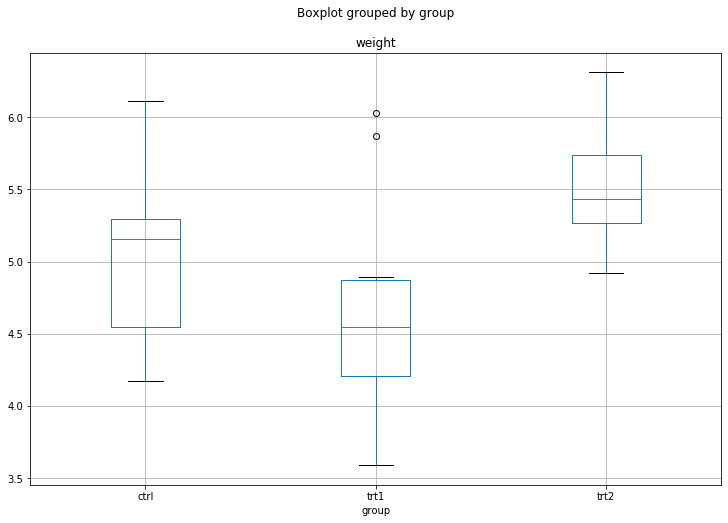

In [6]:
%matplotlib inline
import pandas as pd
datafile = "PlantGrowth.csv"
data = pd.read_csv(datafile)

#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))

ctrl = data['weight'][data.group == 'ctrl']

grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}

k = len(pd.unique(data.group))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('group').size()[0] #Participants in each condition

In [11]:
data['group'].value_counts()

trt2    10
ctrl    10
trt1    10
Name: group, dtype: int64

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [8]:
!pip install statsmodels

     |████████████████████████████████| 8.4MB 4.4MB/s eta 0:00:01
     |████████████████████████████████| 235kB 70.4MB/s eta 0:00:01
